# Анализ гипотез и проведение A/B-теста для увеличения выручки интернет-магазина
В нашем распоряжении список гипотез для увеличения выручки интернет-магазина. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результуты.

Для анализа гипотез предоставлены записи из файла `hypothesis.csv` из 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

Также предоставлены результаты A/B теста, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

Цели проекта:

I. Анализ гипотез
- изучить фреймворки `RICE` и `ICE` на предемт того, как приоритизируются гипотезы;
- проанализировать гипотезы, которые могут помочь увеличить выручку и приоритизировать их по фреймворкам `RICE` и `ICE`;

II. Анализ результатов A/B теста
- сделать предвобработку данных заказов и посетителей;
- проверить как были разбиты заказы и пользователи по группам;
- проанализировать данные на предмет аномалий;
- проанализировать результаты A/B теста по среднему чеку;
- проанализировать результаты A/B теста по количеству заказов на посетителя;
- сделать выводы о том, повлияли ли изменения, которые тестировались на A/B тестах на общую выручку.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Часть первая.  Приоритизация гипотез.

### Загрузка и подготовка данных

In [2]:
pd.options.display.max_colwidth = 400

In [3]:
hyp_data = pd.read_csv('hypothesis.csv')

In [4]:
hyp_data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Переведем все столбцы датасета в нижний регистр.

In [5]:
hyp_data.columns = hyp_data.columns.str.lower()

In [6]:
hyp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


В данных не обнаружено дубликатов.

In [7]:
sum(hyp_data.duplicated())

0

In [8]:
sum(hyp_data.duplicated(subset=['hypothesis']))

0

***Вывод:***
- в файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`;
- в данных не обнаружено никаких пропусков и дубликатов;
- все параметры гипотез были оценены по шкале от 1 до 10, как и положено;
- все столбца таблицы переведены в нижний регистр.

### Приоритезация гипотез с примененимем фреймворка `ICE`
Фреймворк ***ICE*** — один из самых популярных способов приоритизации задач.

Формула: `ICE SCORE` = `Impact` x `Confidence` / `Effort`.

Применим формулу для наших данных.

In [9]:
hyp_data['ICE'] = (hyp_data['impact'] * hyp_data['confidence']).astype(float) / hyp_data['efforts']

In [10]:
hyp_data[['hypothesis', 'ICE', 'impact', 'confidence', 'efforts']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE,impact,confidence,efforts
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,9,9,5
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,10,8,6
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,7,8,5
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,3,8,3
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,3,7,3
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,5,4,10
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,2,2,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,1,1,1


***Вывод:***
Из оценок фреймворка `ICE` можно сделать вывод, что следующие гипотезы являются приоритетными:
- ***8-я гипотеза.*** <u>Запустить акцию, дающую скидку на товар в день рождения.</u><br>Имеет самую высокую оценку, поскольку поздравление пользователя и акция на товар может хорошо повлиять на конверсию в покупку. При этом имеет лучшую оценку уверености (`Confidence`) в оценке двух других параметров.
- ***0-я гипотеза.*** <u>Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.</u> <br>Имеет самую высокую оценку влияния (`Impact`), поскольку мы собираемся привлечь совершенно новых пользователей из других каналов.
- ***7-я гипотеза.*** <u>Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.</u><br>
Имеет хорошую оценку уверености `Confidence` в оценке двух других параметров, поскольку можно четко расчитать сколько усилий потребуется для добавления формы, и насколько хорошо повляют e-mail рассылки на покупуки пользователей.

### Приоритезация гипотез с примененимем фреймворка `RICE`

Для тех же гипотез применим модифицированную версию `RICE`, который использует параметр охвата пользователей `Reach`.

Формула: `RICE SCORE` = `Reach` x `Impact` x `Confidence` / `Effort`.

In [11]:
hyp_data['RICE'] = (
    hyp_data['reach'] * hyp_data['impact'] * hyp_data['confidence']
).astype(float) / hyp_data['efforts']

In [12]:
hyp_data[['hypothesis', 'RICE', 'reach']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE,reach
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,8
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,5
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,1
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,3


***Вывод:***
Из оценок фреймворка `RICE` можно сделать вывод, что:
- с отрывом в два раза по оценке ***7-ая гипотеза*** с добавлением форм подписок для сбора email'ов является самой приоритетной, поскольку помимо других хороших оценок, рассматриваемых для фремворка `ICE` выше, она охватывает всех пользователей, перешедших на наш сайт, с целью сбора данных.
- ***2-ая*** также являются приоритетными после 7-ой, поскольку они касаются изменений на основных экранах сайта, из-за ччего имеет хороших охват пользователей `Reach` (8 баллов);
- ***6-ая*** гипотеза попала в топ приоритетов из-за низкого значения `Еfforts` прилагаемых услилий для добавления баннера (3 балла);
- ***0-я гипотезы*** с привлечением новых пользователей, не имеет большого охвата, поскольку не касается старых пользователей, но также является приоритетной из-за необходимости расширения базы клиентов.

### Сравнение оценок гипотез по фреймворкам `RICE` и `ICE` 

Выведем оценки гипотез по `RICE` и `ICE` и добавим параметр `Reach`, который является ключевой разницей в формулах этих фреймворков. 

In [13]:
hyp_data[['hypothesis', 'RICE', 'ICE', 'reach']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE,ICE,reach
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.200000,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.000000,8
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.333333,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.000000,5
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.200000,1
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.125000,8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.000000,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.333333,3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.000000,3


***Вывод:***
Из оценок гипотез по методам мы видим расхождения между `RICE` и `ICE`:
- Параметр охвата пользователей `Reach` сильно влияет на приоритезацию гипотез для существенных улучшений основных метрик;
- На ***8-ю гипотеза***, имея низких охват из-за применимости акции раз в год для каждого пользователя, очень сильно снизился приоритет для фремворка `RICE`;
- На передний план вышли те гипотезы, которые касаются подписок, сбора информации и изменений на главном экране по сравнению с более узконаправленными изменениями.

### Общий вывод

В первой части проекта были проанализированы гипотезы на предмет приоритизации их по фреймворкам `RICE` и `ICE`. Из него мы видим, что приоритеты могут разняться в зависимости от пользовательского охвата гипотезы, из-за чего лучше выбирать гипотезы на проверку исходя из оценки `RICE`.

По фреймворку `RICE` самой приоритетной на проверку является ***7-я гипотеза*** *'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'*. Его рейтинг составляет 112 баллов, что в два раза больше, чем вторая по приоритету гипотеза. 

Можно также выделить 3 гипотезы, которые также стоит проверить:
- ***2-я гипотеза*** (56 баллов) *Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа* из-за хороших значений `Reach` (7 баллов), `Impact` (8 баллов) и уверености в этих оценках `Confidence`;
- ***0-я гипотеза*** (40 баллов) *Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей* из-за наивысшего показателя `Impact` (10 баллов), поскольку привлечение новых пользователей из других источников должно улучшить общую выручку;
- ***6-я гипотеза*** (40 баллов) *Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию*, поскольку добавление баннера и соответсвенно имеют низкое значение `Efforts` (3 балла).

## Часть 2. Анализ A/B-теста

### Загрузка и подготовка данных

Выгрузим данные из файлов `/datasets/orders.csv` и `/datasets/orders.csv` и проанализируем данные на пропуски и дубликаты.

In [14]:
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

#### Анализ данных заказов

In [15]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [17]:
orders.columns = ['transactionId', 'visitorId', 'date', 'revenue', 'group']

Вычилим даты первого и последних заказов и выясним, что все заказы были совершены **в августе 2019 года**.

In [18]:
print('Дата первого заказа: ', min(orders.date))
print('Дата последнего заказа: ', max(orders.date))

Дата первого заказа:  2019-08-01
Дата последнего заказа:  2019-08-31


Проверим и увидим, что не обнаружено никаких дубликатов и во всех заказы были присвоены уникальные идентификаторв.

In [19]:
sum(orders.duplicated())

0

In [20]:
len(orders.transactionId.unique())

1197

Вычислим диапазон значений суммы заказов и увидми, что минимальная сумма заказов составляет 50 рублей, что является привемлемым значением. 
Максимальная сумма зазказа составляет 1294500 рублей, что является аномалией, но при этом допустимой для 1 заказа.

In [21]:
print('Минимальная сумма заказа: ', min(orders.revenue))
print('Максимальная сумма заказа: ', max(orders.revenue))

Минимальная сумма заказа:  50
Максимальная сумма заказа:  1294500


#### Анализ пересечений групп

Вычислим количество клиентов по группам. Из данных, мы видим, что посетителей из ***группы B*** на 83 больше, чем в ***группе A***.

In [22]:
orders.groupby('group').agg({'visitorId': 'nunique'})

,visitorId
group,
A,503
B,586


Вычислим количество клиентов по группам. Из данных, мы видим, что заказов посетителей из ***группы B*** на 83 больше, чем в ***группе A***.

In [23]:
orders.groupby('group').agg({'transactionId': 'nunique'})

,transactionId
group,
A,557
B,640


Вычислим количество пользователей, которые вошли в обе группы и увидим 58 таких клиентов, что составляет 5.6% от общего числа пользоваетей и что делает разбивку заказов по группам.

In [24]:
visitorGroups = orders.groupby('visitorId').agg({'group': lambda x: "".join(sorted(x.unique()))})
intersectionVisitorGroups = visitorGroups[visitorGroups.group == 'AB']
intersectionOrders = orders[orders['visitorId'].isin(intersectionVisitorGroups.index)]

print("Кол-во пользователей, которые вошли в обе группы:", len(intersectionVisitorGroups.index))
print("Доля пользователей, которые вошли в обе группы: {:.1f}%".format(100 * len(intersectionVisitorGroups.index) / len(orders.visitorId.unique())))
print("Доля заказов от пересекающихся пользователей: {:.1f}%".format(100 * len(intersectionOrders.index) / len(orders.transactionId.unique())))

Кол-во пользователей, которые вошли в обе группы: 58
Доля пользователей, которые вошли в обе группы: 5.6%
Доля заказов от пересекающихся пользователей: 15.1%


Необходимо отфильтровать заказы от пользователей, чьи заказы попали в обе группы, поскольку неизвестно причины пересечений групп и как были распределены по группам в файле 'visitors'.

In [25]:
filtered_orders = orders[~orders['visitorId'].isin(intersectionVisitorGroups.index)]
filtered_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


#### Преданализ данных количества посетителей по дням и группам

In [26]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [27]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Выведем количество пользователей по группам и увидим, что пользователи были распределены равномерно по контрольной и тестируемой группе.

In [28]:
visitors.groupby('group').agg({'date': 'nunique', 'visitors': 'sum'})

,date,visitors
group,,
A,31,18736
B,31,18916


#### Вывод
По предварительному анализу можно сделать следующие выводы:
- Обнаружено **1197 записей** заказов пользователей;
- Заказы были совершены в **в августе 2019 года**;
- Были найдены клиенты, чьи заказы попали в обе группы; их заказы были отфильтрованы из данных.
- Посетители сайта были равномерно распределены по контрольной и тестируемых группах.

### Куммулятивная выручка по группам

Построим график кумулятивной выручки по группам.

In [29]:
ordersData = filtered_orders.groupby(['group', 'date'], as_index=False).agg({'revenue': 'sum', 'transactionId': 'nunique'}).sort_values(by='date')
ordersData.columns = ['group', 'date', 'revenue', 'orders']

ordersData['revenueCum'] = ordersData.apply(lambda x: ordersData[np.logical_and(ordersData['date'] <= x['date'], ordersData['group'] == x['group'])]['revenue'].sum(), axis=1)
ordersData['ordersCum'] = ordersData.apply(lambda x: ordersData[np.logical_and(ordersData['date'] <= x['date'], ordersData['group'] == x['group'])]['orders'].sum(), axis=1)

ordersDataA = ordersData[ordersData['group'] == 'A']
ordersDataB = ordersData[ordersData['group'] == 'B']

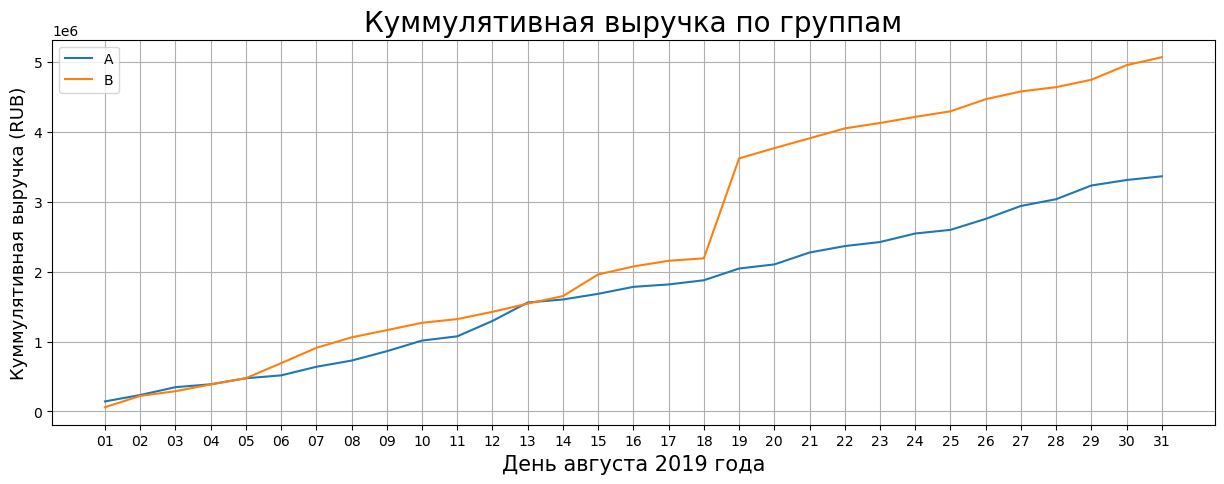

In [30]:
plt.figure(figsize=(15, 5))

plt.title('Куммулятивная выручка по группам', fontsize=20)
plt.xlabel('День августа 2019 года', fontsize=15)
plt.ylabel('Куммулятивная выручка (RUB)', fontsize=13)
plt.grid(True)

plt.plot(ordersDataA['date'], ordersDataA['revenueCum'], label='A')
plt.plot(ordersDataB['date'], ordersDataB['revenueCum'], label='B')

days = list(date[8:] for date in ordersDataA.date)
plt.xticks(list(range(len(days))), days)

res = plt.legend()

***Вывод:***

По графику можно увидеть, что:
- кумулятивная выручка в динамике растет равномерно по группам с небольшим опережением ***группы B***;
- 19 августа произошел резкий скачок в ***группе B***. Можно предположить, что в этот день были аномальные покупка пользователя из ***группы B***.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ График построен верно и можем зафиксировать аномалию в группе В.
</div>

### Кумулятивный средний чек по группам

Построим график кумулятивного среднего чека по группам.

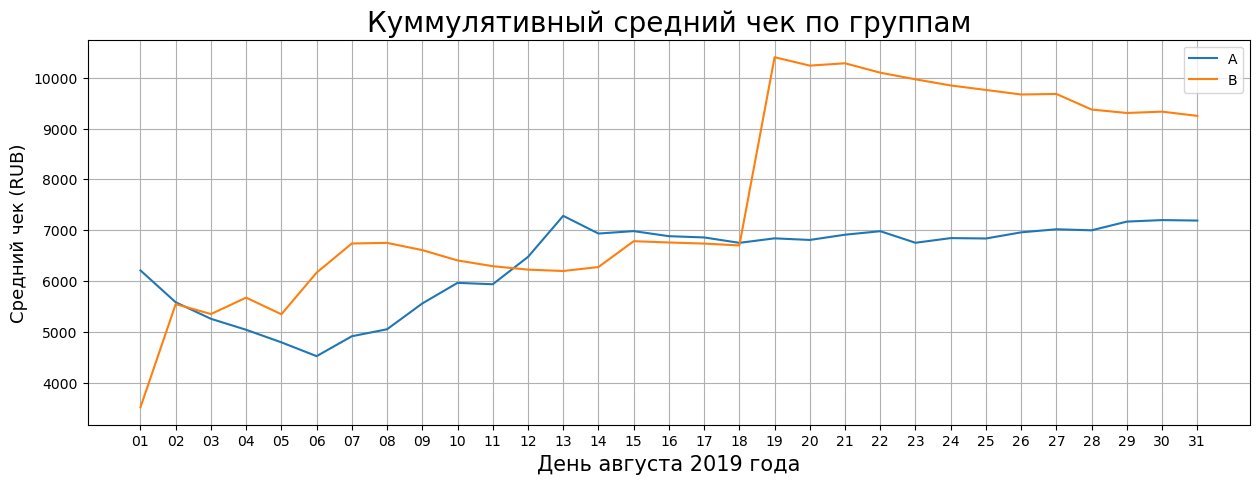

In [31]:
plt.figure(figsize=(15, 5))
plt.title('Куммулятивный средний чек по группам', fontsize=20)
plt.xlabel('День августа 2019 года', fontsize=15)
plt.ylabel('Cредний чек (RUB)', fontsize=13)
plt.grid(True)

plt.plot(ordersDataA['date'], ordersDataA['revenueCum']/ordersDataA['ordersCum'], label='A')
plt.plot(ordersDataB['date'], ordersDataB['revenueCum']/ordersDataB['ordersCum'], label='B')
plt.xticks(list(range(len(days))), days)

res = plt.legend()

***Вывод:***

По графику можно видеть, что:
- первые 10 дней средний чек по группам скакал очень сильно и смог устаканиться к 15-17 августа;
- 19 августа также можно увидеть уже знакомый скачок в группе B, который сделал существенную разницу между группами;
- если вычесть разницу, который произошел в средних чекам мужду 18 и 19 августа, то куммулятивный средний чек в ***группе B*** на последний день был бы ниже, чем в ***группе A***;
- продолжаем предполагать, что в этот день произошла аномальная покупка на большую сумму, который исказил данные.

### Относительное изменения кумулятивного среднего чека

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

In [32]:
mergedData = ordersDataA[['date', 'revenueCum', 'ordersCum']] \
      .merge(ordersDataB[['date', 'revenueCum', 'ordersCum']], on='date', suffixes=['A', 'B'])

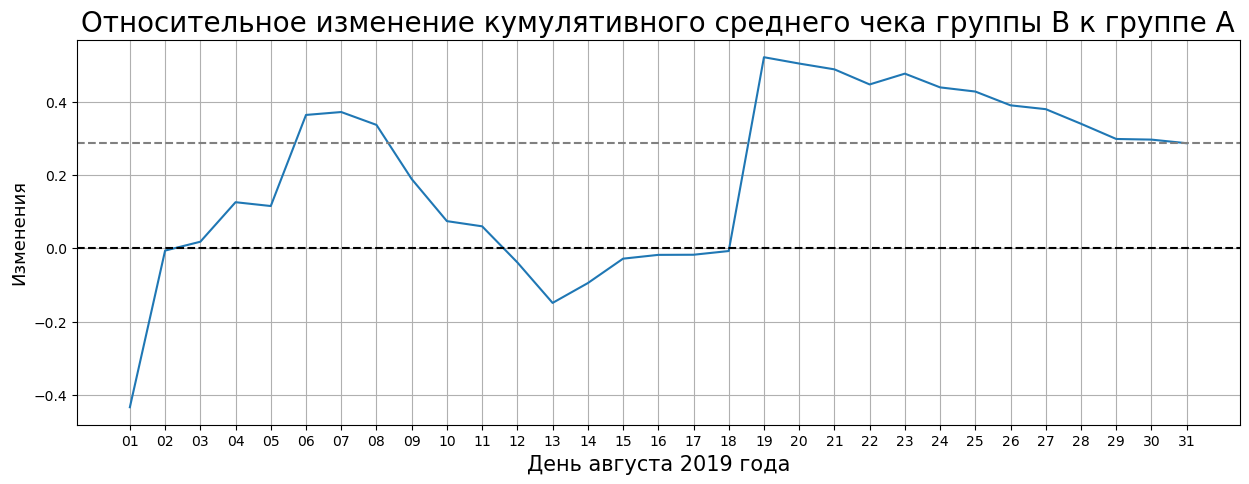

In [33]:
diffs = (
    (mergedData['revenueCumB']/mergedData['ordersCumB']) / 
    (mergedData['revenueCumA']/mergedData['ordersCumA']) -1
)

plt.figure(figsize=(15, 5))
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A', fontsize=20)
plt.xlabel('День августа 2019 года', fontsize=15)
plt.ylabel('Изменения', fontsize=13)

plt.grid()
plt.plot(mergedData['date'], diffs)
plt.xticks(list(range(len(days))), days)
res = plt.axhline(y=0, color='black', linestyle='--') 
res = plt.axhline(y=diffs.iloc[-1], color='grey', linestyle='--')

***Вывод:***

По графику можно сделать такие же выводы и преположения как и в предыдущем пнкте:
- по первым 15 дням нельзя динамика была очень изменчивая и несколько раз пересекала отметку 0 и пока нельзя по ним сделать вывод о том, в какой группе больше средний чек;
- на 19 число также видим влияение аномального скачка в ***группе B*** и то, как это повлияло но относительную разницу между группами (изменение разницы с 0 до 50 процентов);
- после аномального скачка относительная разница от  ***группы B*** к  ***группе A*** постепенно снижалась, что подтверждает предположение об аномальности покупок 19 числа.

### Кумулятивное среднее количество заказов на посетителя по группам

Построим график кумулятивного среднего количества заказов на посетителя по группам.

In [34]:
visitors['visitorsCum'] = visitors.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].visitors.sum(), axis=1)
visitorsA = visitors[visitors['group'] == 'A']
visitorsB = visitors[visitors['group'] == 'B']

In [35]:
allMergedData = mergedData \
    .merge(visitorsA[['date', 'visitorsCum']], on='date').rename({'visitorsCum': 'visitorsCumA'}, axis=1) \
    .merge(visitorsB[['date', 'visitorsCum']], on='date').rename({'visitorsCum': 'visitorsCumB'}, axis=1)

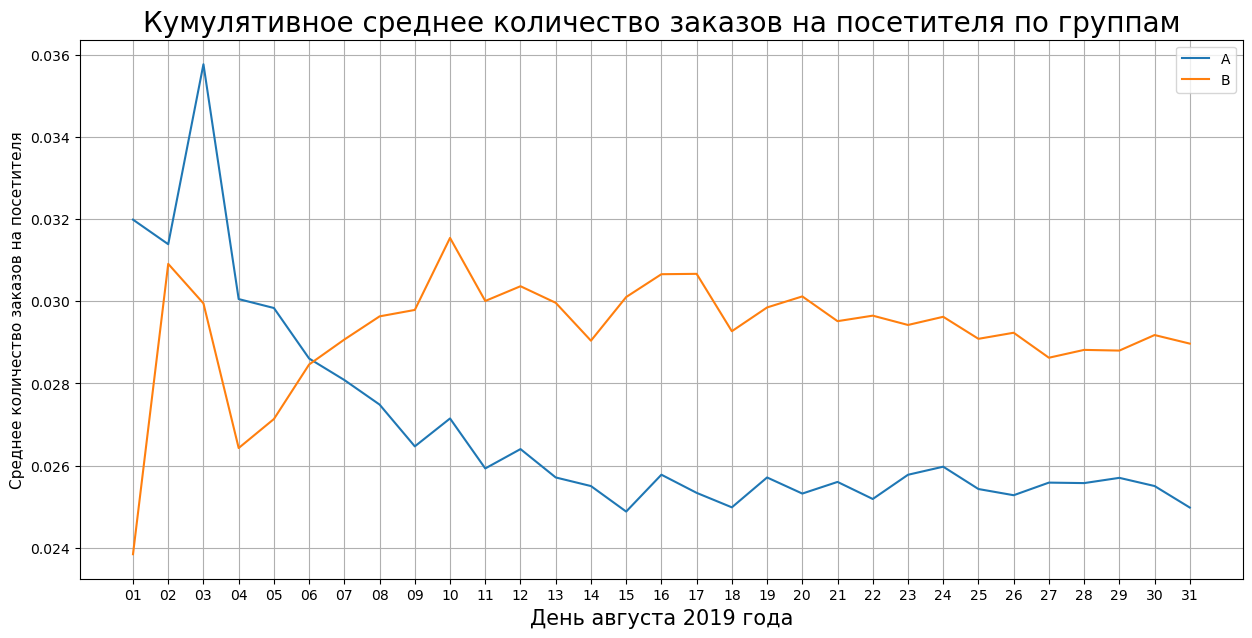

In [36]:
plt.figure(figsize=(15, 7))
plt.title('Кумулятивное среднее количество заказов на посетителя по группам', fontsize=20)
plt.xlabel('День августа 2019 года', fontsize=15)
plt.ylabel('Среднее количество заказов на посетителя', fontsize=11)

plt.plot(allMergedData['date'], allMergedData['ordersCumA'] / allMergedData['visitorsCumA'], label='A')
plt.plot(allMergedData['date'], allMergedData['ordersCumB'] / allMergedData['visitorsCumB'], label='B')
plt.grid()
plt.xticks(list(range(len(days))), days)
res = plt.legend()

In [37]:
print("Среднее количество заказов на посетителя в группе А: {:.3f}".format((allMergedData['ordersCumA'] / allMergedData['visitorsCumA']).iloc[-1]))
print("Среднее количество заказов на посетителя в группе B: {:.3f}".format((allMergedData['ordersCumB'] / allMergedData['visitorsCumB']).iloc[-1]))

Среднее количество заказов на посетителя в группе А: 0.025
Среднее количество заказов на посетителя в группе B: 0.029


***Вывод:***
По данным графика можно сделать следующие выводы:
- первые 8 дня не было очевидно, какая группа по данной метрике лучше;
- c 9-10 августа куммулятивное среднее количество заказов на пользователя начало устаканиваться до конца месяца видно стабильное превосходство ***группы B***;
- 19 августа не было обнаружено никаких аномалий по среднему количеству заказов на пользователя, соответсвенно можем предположить, что в этот день была одна аномальная покупка на большую сумму;
- по значениям куммулятивного среднего количества заказов на последний день наблюдения нельзя пока делать вывод, является ли ***группа B*** (0.029 покупок на посетителя) превосходящей группу ***группу A*** (0.025 покупок на посетителя) по данной метрике.

### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

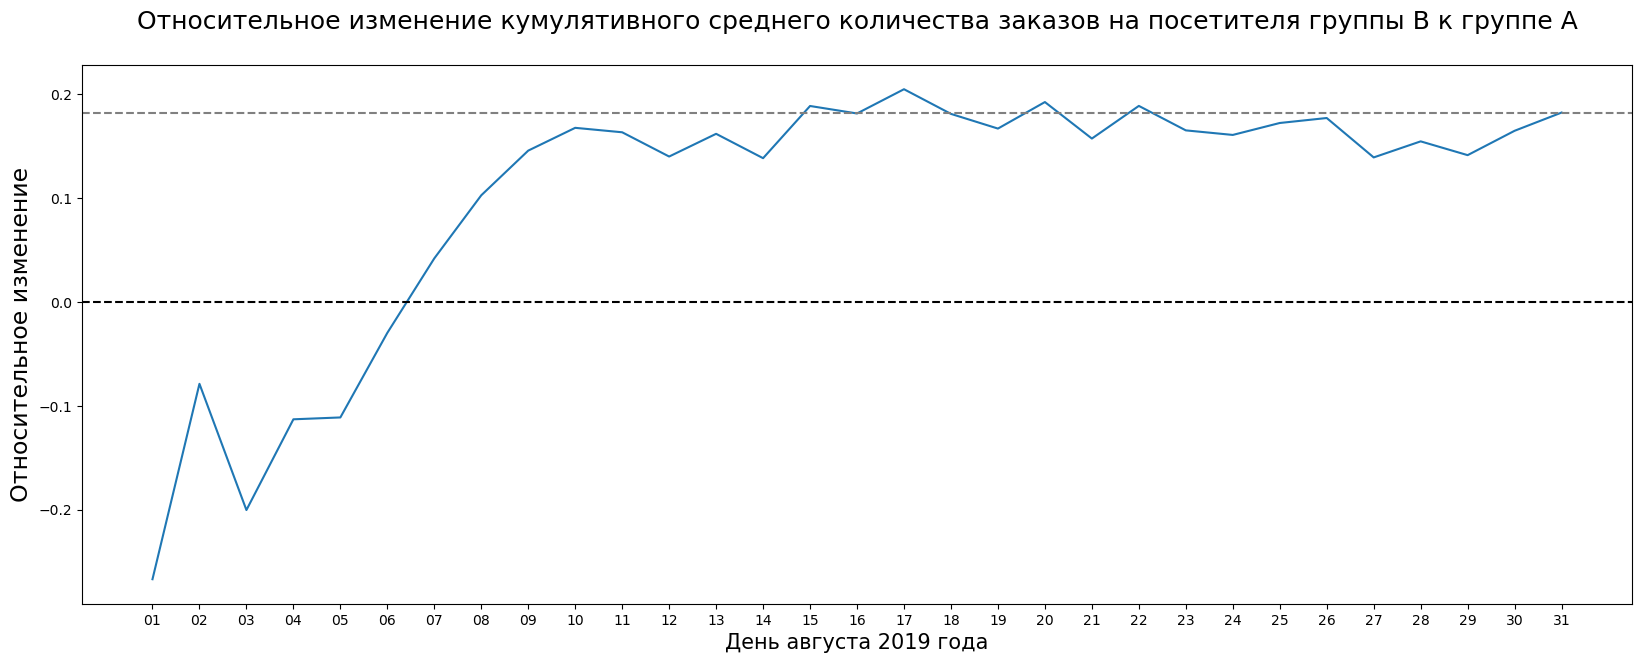

In [38]:
diffsOrders = (
    (allMergedData['ordersCumB'] / allMergedData['visitorsCumA']) / 
    (allMergedData['ordersCumA'] / allMergedData['visitorsCumB']) -1
)

plt.figure(figsize=(20, 7))
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A\n', fontsize=18)
plt.xlabel('День августа 2019 года', fontsize=15)
plt.ylabel('Относительное изменение', fontsize=17)

plt.plot(mergedData['date'], diffsOrders)
plt.xticks(list(range(len(days))), days)
res = plt.axhline(y=0, color='black', linestyle='--') 
res = plt.axhline(y=diffsOrders.iloc[-1], color='grey', linestyle='--')

In [39]:
print("Относительная разница среднего кол-ва заказов на посетителя группы B к группе А: {:.1f}%".format(100 * diffsOrders.iloc[-1]))

Относительная разница среднего кол-ва заказов на посетителя группы B к группе А: 18.2%


***Вывод:***
По данным графика можно сделать следующие выводы:
- первые 8 дня не было очевидно, какая группа по данной метрике лучше;
- c 9-10 августа относительная разница куммулятивного среднего количество заказов на пользователя начало устаканиваться; до конца месяца видно стабильное превосходство ***группы B*** в среднем на ***18.2 процентов***;
- 19 августа не было обнаружено никаких аномалий по среднему количеству заказов на пользователя, соответсвенно можем предположить, что в этот день была одна аномальная покупка на большую сумму;
- по данным нельзя пока делать вывод, является ли это превосходство ***группы B*** на ***18.2 процентов*** сущуственной по данной метрике.

### Аномалии количества заказов по пользователям

Построим точечный график числа заказов по пользователям.

In [40]:
ordersByUsers = filtered_orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique', 'group': 'first'})
ordersByUsers = ordersByUsers.rename(columns={'transactionId': 'orders'})
ordersByUsersA = ordersByUsers[ordersByUsers.group == 'A']
ordersByUsersB = ordersByUsers[ordersByUsers.group == 'B']

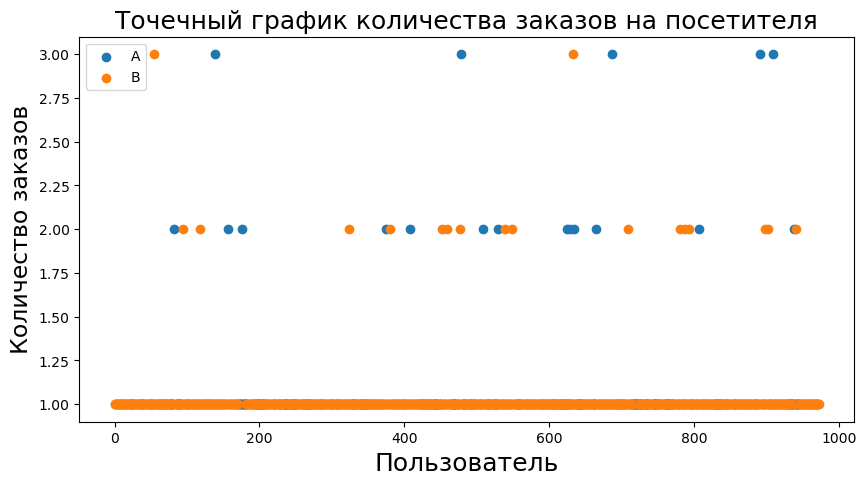

In [41]:
x_values_a = ordersByUsersA.index
x_values_b = ordersByUsersB.index
plt.figure(figsize=(10, 5))
plt.title('Точечный график количества заказов на посетителя', fontsize=18)
plt.xlabel('Пользователь', fontsize=18)
plt.ylabel('Количество заказов', fontsize=17)
ax = plt.scatter(x_values_a, ordersByUsersA.orders, label='A')
ax = plt.scatter(x_values_b, ordersByUsersB.orders, label='B')
res = plt.legend(loc="upper left")

По графику видно, что в основном всречаются пользователи, которые совершили от 1 до 2 покупки. Пользователи, которые совершили от 4 и более покупок можно считать редкими. Определим  границу для определения аномальных пользователей, посчитав 95-й и 99-й перцентили количества заказов на пользователя.

In [42]:
# Найдем перцентили по количеству заказов по пользователям
np.percentile(ordersByUsers.orders, [95, 99])

array([1., 2.])

По данным мы видим, что если отбросим посетителей с 2 заказами и более, то это составит 1-5 процента от общего числа посетителей.

Сохраним в переменную список индентификаторов с 2+ покупками для дальнейшего исследования (36 посетителей).

In [43]:
# Найдем идентификаторы пользователей, которые посчитаем аномальными
anomalsUsersIds = list(ordersByUsers[ordersByUsers.orders >= 2].visitorId)

In [44]:
# Посчитаем абсолютное количество пользователей, которых мы посчитали аномальными
len(anomalsUsersIds)

36

In [45]:
# Посчитаем относительное от общего числа количество пользователей, которые мы посчитали аномальными
len(anomalsUsersIds) / len(ordersByUsers)

0.03699897225077081

***Выввод:***

Мы построили точечный график количества заказов на посетителя, посчитали перцентили и определили для себя, что аномальными будут считаться посетители с ***2+ покупками***, что составляет ***1-5%*** от общего числа.
Если быть более точным, то это ***36 аномальных пользователей***, что составляет ***3.6%*** от общего числа.

Сохранили индентификаторы таких пользователей для очищения данных в следующих задачах.

### Аномалии стоимости заказов

Построим точечный график тоимости заказов.

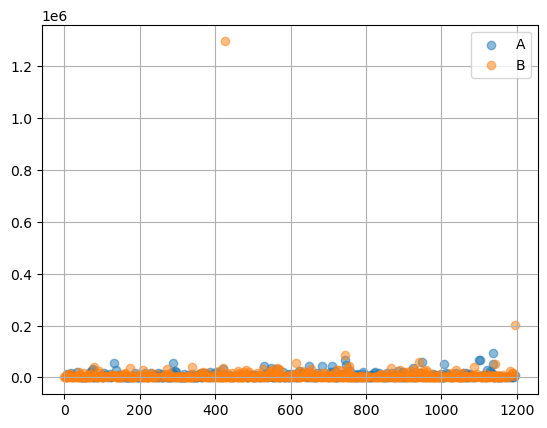

In [46]:
ordersA = filtered_orders[filtered_orders.group == 'A']
ordersB = filtered_orders[filtered_orders.group == 'B']
x_values_a = ordersA.index
x_values_b = ordersB.index
ax = plt.scatter(x_values_a, ordersA.revenue, label='A', alpha=0.5)
ax = plt.scatter(x_values_b, ordersB.revenue, label='B', alpha=0.5) 
res = plt.grid()
res = plt.legend()

Из графика видим:
- самый дорогой заказ вышел за пределы 1.2 рублей по общей стоимости;
- второй по стоимости заказ состоваляет примерно 200 тысяч рублей.

Выведем топ-5 самых дорогих заказав по стоимости.

In [47]:
filtered_orders.sort_values(by='revenue', ascending=False).head()

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A


Из таблицы мы видим, что самый дорогой заказ как раз произошел посетититлем из ***группы B*** как раз ***19 августа***, когда мы видели резкие скачки в графиках куммулятивного среднего чека и куммулятивной выручке.

Второй по стоимости заказ на ***202 тысячи рублей*** произошел также от посетителя из ***группы B 15 августа*** и также мог повлиять на тестовую группу в результатах предыдущих проведенных анализов.

Укрупним точечный график стоимости заказов.

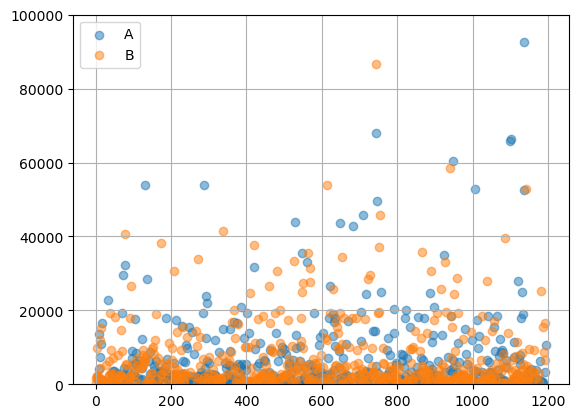

In [48]:
plt.ylim(0, 100000)
plt.grid()
ax = plt.scatter(x_values_a, ordersA.revenue, label='A', alpha=0.5)
ax = plt.scatter(x_values_b, ordersB.revenue, label='B', alpha=0.5) 
res = plt.legend()

Из графика мы видим, что примерно заказы: начиная примерно от 40-60 тысяч рублей довольно редки.
Чтобы быть более точными в соотношении, посчитаем 95-ый, 97-ой и 99-ые перцентили стоимости заказов.

In [49]:
# Найдем перцентили по стоимости заказов
np.percentile(filtered_orders.revenue, [95, 97, 99])

array([26785., 34792., 53904.])

Из него мы видим, что если отбросим заказы начиная от ***40 тысяч рублей***, то это. составит ***от 1 до 3 процентов*** от общего числа заказов.

In [50]:
# Найдем идентификаторы заказов, которые посчитаем аномальными
anomalsOrders = filtered_orders[filtered_orders.revenue >= 40000]
anomalsTransactionIds = anomalsOrders.transactionId

In [51]:
# Посчитаем абсолютное количество заказов по группам, которых мы посчитали аномальными
anomalsOrders.group.value_counts()

group
A    14
B     9
Name: count, dtype: int64

In [52]:
# Посчитаем относительное от общего числа количество заказов, которые мы посчитали аномальными
len(anomalsTransactionIds) / len(filtered_orders.transactionId)

0.022637795275590553

***Выввод:***

Мы построили точечный график стоимости заказов, посчитали перцентили и определили для себя, что аномальными будут считаться заказы от ***40 тысяч рублей***, что составляет ***1-3%*** от общего числа заказов. 
Если быть более точным, то это ***23 аномальных пользователей***, что составляет примерно ***2.3%*** от общего числа.

Также выяснили какой именно заказ 19 августа повлиял на графики куммулятивную выручку и средний чек пользователей из ***группы B***. Cумма этого заказа состовляет примерно ***1.3 миллиона рублей***, что является серьезным выбросом даже если сравнивать со вторым и третьим заказом по стоимости (***203 и 94 тысячи рублей*** соответсвенно).

### A/B-тест количества заказов на посетителя 

#### A/B-тест на "сырых" данных
Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами.

Для начала соберем контрольную и тестовую группы, добавив посетителей, не совершивших заказы.

In [53]:
ordersByUsersA = filtered_orders[filtered_orders.group == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsersA = ordersByUsersA.rename(columns={"transactionId": "orders"})

ordersByUsersB = filtered_orders[filtered_orders.group == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsersB = ordersByUsersB.rename(columns={"transactionId": "orders"})

Подготовим данные заказов для групп, добавив нулевые заказы для пользователей, которые не совершали заказы.

In [54]:
sampleOrdersA = ( 
    pd.concat([
        ordersByUsersA.orders,
        pd.Series(0, index=np.arange(visitorsA.visitors.sum() - len(ordersByUsersA.orders)), name='orders'),
    ], axis=0)
)
sampleOrdersB = ( 
    pd.concat([
        ordersByUsersB.orders,
        pd.Series(0, index=np.arange(visitorsB.visitors.sum() - len(ordersByUsersB.orders)), name='orders'),
    ], axis=0)
)

Проверим разберы выборок соответсвуют количеству посетителей за этот месяц (пункт 2.1.2).

In [55]:
print("Размер выборки группы A:", len(sampleOrdersA))
print("Размер выборки группы B:", len(sampleOrdersB))

Размер выборки группы A: 18736
Размер выборки группы B: 18916


Выведем среднее количество заказов и убедимся, что они соответсвуют куммулятивным значениям на последний день (пункт 2.5). Видно, что количество заказов на посетителя у группы B выше, однако, нельзя сказать, что разница является существенной.

In [56]:
print("Cреднее значение кол-ва заказов на посетителя группы A: {0:.5f}".format(sampleOrdersA.mean()))
print("Cреднее значение кол-ва заказов на посетителя группы B: {0:.5f}".format(sampleOrdersB.mean()))

Cреднее значение кол-ва заказов на посетителя группы A: 0.02498
Cреднее значение кол-ва заказов на посетителя группы B: 0.02897


Установим значение статистической значимости тестов равную 0.05

In [57]:
alpha = 0.05

Сформулируем основную и альтернативную гипотезы, которые будем прверять:
- H0 - Нет различий между группами в количестве заказов на посетителя;
- H1 - Есть различия между группами в количестве заказов на посетителя.

Проверим гипотезу об отсутствии различий между группами, проведя непараметрический тест Уилкоксона-Манна-Уитни.

In [58]:
pvalue = stats.mannwhitneyu(sampleOrdersA, sampleOrdersB)[1]
print("P-value: {0:.3f}".format(pvalue))
print("Относительная разница: {0:.3f}".format(sampleOrdersB.mean() / sampleOrdersA.mean() - 1))
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница в количестве заказов на пользоваетеля статистически значима')
else:
    print('Не удалось отвергнуть нулевую гипотезу, вывод о различии количества заказов на пользоваетеля сделать нельзя.')

P-value: 0.011
Относительная разница: 0.160
Отвергаем нулевую гипотезу: разница в количестве заказов на пользоваетеля статистически значима


По результату тесту мы выяснили, что разница на ***16%*** количество заказов ***статистически значима*** между группами на "сырых" данных. Количество заказов на посетителя у ***группы B*** выше, чем у ***группы A***.

#### A/B-тест на "очищенных" данных

Проведем тест, удалив пользователей с аномально большим количеством заказов.

In [59]:
sampleOrdersFilteredA = ( 
    pd.concat([
        ordersByUsersA[
            np.logical_not(ordersByUsersA.visitorId.isin(anomalsUsersIds))
        ].orders,
        pd.Series(0, index=np.arange(visitorsA.visitors.sum() - len(ordersByUsersA.orders)), name='orders'),
    ], axis=0)
)
sampleOrdersFilteredB = ( 
    pd.concat([
        ordersByUsersB[
            np.logical_not(ordersByUsersB.visitorId.isin(anomalsUsersIds))
        ].orders,
        pd.Series(0, index=np.arange(visitorsB.visitors.sum() - len(ordersByUsersB.orders)), name='orders'),
    ], axis=0)
)

Выведем среднее количество заказов. Видно, что количество заказов на посетителя у группы B также выше, однако, нельзя сказать, что разница является существенной.

In [60]:
print("Cреднее значение кол-ва заказов на посетителя группы A: {0:.5f}".format(sampleOrdersFilteredA.mean()))
print("Cреднее значение кол-ва заказов на посетителя группы B: {0:.5f}".format(sampleOrdersFilteredB.mean()))

Cреднее значение кол-ва заказов на посетителя группы A: 0.02281
Cреднее значение кол-ва заказов на посетителя группы B: 0.02699


Сформулируем основную и альтернативную гипотезы, которые будем прверять:
- **H0** - Нет различий между группами в количестве заказов на посетителя;
- **H1** - Есть различия между группами в количестве заказов на посетителя.

Проверим гипотезу о обсутствии различий между группами, проведя непараметрический тест Уилкоксона-Манна-Уитни, но уже на "очищенных" данных.

In [61]:
pvalue = stats.mannwhitneyu(sampleOrdersFilteredA, sampleOrdersFilteredB).pvalue
print("P-value: {0:.3f}".format(pvalue))
print("Относительная разница: {0:.3f}".format(sampleOrdersFilteredB.mean() / sampleOrdersFilteredA.mean() - 1))
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница в количестве заказов на пользоваетеля статистически значима')
else:
    print('Не удалось отвергнуть нулевую гипотезу, вывод о различии количества заказов на пользоваетеля сделать нельзя.')

P-value: 0.009
Относительная разница: 0.183
Отвергаем нулевую гипотезу: разница в количестве заказов на пользоваетеля статистически значима


По результату тесту мы выяснили, что разница на ***18.3%*** количества заказов ***статистически значима*** между группами уже на "очищенных" данных.

#### Вывод

<u>Количество заказов на пользователя из группы B выше, чем в группе A</u>, как и на "сырых", так и на "очищценных" данных, проведя непараметрический тест Уилкоксона-Манна-Уитни. Поскольку на графике куммулятивных значений (пункт 2.5) значения устаканились на последние 10 дней наблюдения, то можно остановить тест и ***зафиксировать победу в группе B в количестве заказов на пользователя***.

### A/B-тест среднего чека

#### A/B-тест на "сырых" данных

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Подготовим данные для теста.

In [62]:
sampleRevenueA = filtered_orders[filtered_orders['group'] == 'A']['revenue']
sampleRevenueB = filtered_orders[filtered_orders['group'] == 'B']['revenue']

Вычислим средние чеки посетителей по группам. Убедимся, что средние значения соответсвуют последним значениям на графике куммулятивных средних чеков (пункт 2.3). 

In [63]:
print("Среднее значение чека посетителей группы A: {:.2f} рублей".format(sampleRevenueA.mean()))
print("Среднее значение чека посетителей группы B: {:.2f} рублей".format(sampleRevenueB.mean()))

Среднее значение чека посетителей группы A: 7189.44 рублей
Среднее значение чека посетителей группы B: 9249.95 рублей


Установим значение статистической значимости тестов равную 0.05

In [64]:
alpha = 0.05

Сформулируем основную и альтернативную гипотезы, которые будем прверять:
- **H0** - Нет различий между группами в среднем чеках;
- **H1** - Есть различия между группами  в среднем чеках.

Проверим гипотезу о обсутствии различий средних чеков между группами, проведя непараметрический тест Уилкоксона-Манна-Уитни, но на "сырых" данных.

In [65]:
pvalue = stats.mannwhitneyu(sampleRevenueA, sampleRevenueB).pvalue
print("P-value: {0:.3f}".format(pvalue))
print("Относительная разница: {0:.3f}".format(sampleRevenueB.mean() / sampleRevenueA.mean() - 1))
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница в среднем чеке статистически значима')
else:
    print('Не удалось отвергнуть нулевую гипотезу, вывод о различии средних чеков сделать нельзя.')

P-value: 0.829
Относительная разница: 0.287
Не удалось отвергнуть нулевую гипотезу, вывод о различии средних чеков сделать нельзя.


Из результатов теста можно сделать вывод, что на "сырых" данных разница в ***28.7%*** в средних значениях между группами B и A ***НЕ является статистически значимой***, несмотря на кажущуюся большую относительную разницу и наличии аномальных заказов в группе B.

#### A/B-тест на "очищенных" данных

Проведем тест, удалив заказы с аномально большим чеком.

In [66]:
sampleRevenueFilteredA = filtered_orders[
    np.logical_and(
        filtered_orders['group'] == 'A',
        np.logical_not(filtered_orders.transactionId.isin(anomalsTransactionIds))
    )
]['revenue']
sampleRevenueFilteredB = filtered_orders[
    np.logical_and(
        filtered_orders['group'] == 'B',
        np.logical_not(filtered_orders.transactionId.isin(anomalsTransactionIds))
    )
]['revenue']

In [67]:
print("Среднее значение чека посетителей группы A: {:.2f} рублей".format(sampleRevenueFilteredA.mean()))
print("Среднее значение чека посетителей группы B: {:.2f} рублей".format(sampleRevenueFilteredB.mean()))

Среднее значение чека посетителей группы A: 5666.57 рублей
Среднее значение чека посетителей группы B: 5921.68 рублей


Сформулируем основную и альтернативную гипотезы, которые будем прверять:
- **H0** - Нет различий между группами в среднем чеках;
- **H1** - Есть различия между группами  в среднем чеках.

Проверим гипотезу о обсутствии различий средних чеков между группами, проведя непараметрический тест Уилкоксона-Манна-Уитни, но на "очищенных" данных.

In [68]:
pvalue = stats.mannwhitneyu(sampleRevenueFilteredA, sampleRevenueFilteredB).pvalue
print("P-value: {0:.3f}".format(pvalue))
print("Относительная разница: {0:.3f}".format(sampleRevenueFilteredB.mean() / sampleRevenueFilteredA.mean() - 1))
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница в среднем чеке статистически значима')
else:
    print('Не удалось отвергнуть нулевую гипотезу, вывод о различии средних чеков сделать нельзя.')

P-value: 0.873
Относительная разница: 0.045
Не удалось отвергнуть нулевую гипотезу, вывод о различии средних чеков сделать нельзя.


Из результатов теста можно сделать вывод, что на "очищенных" данных разница в средних чеках между группами B и A также ***НЕ является статистически значимой***.
Тем более можно отметить, что относительная разница в средних чеках сократилась с ***28.7%%*** до ***4.5%***.

#### Вывод

<u>Количество заказов на пользователя из группы B НЕ выше, чем в группе A</u>, как и на "сырых", так и на "очищценных" данных, проведя непараметрический тест Уилкоксона-Манна-Уитни. Поскольку на графике куммулятивной относительной разнице (пункт 2.4) последние 10 дней наблюдения разница между группами постепенно снижалось, то можно остановить тест и ***зафиксировать отсутствие различий в средних чеках***.

### Выводы на основе результатов A/B тестов

По результатам A/B тестов были сделаны следующие выводы:
- ***в группе B*** выше количество заказов на пользователя, чем в группе A.
- ***в группах A и B*** нет различий в средних чеках;
- по динамике за послдение 10 дней наблюдения значения средних чеков и количество заказов на посетителя устаканились, поэтому можем результаты выше зафиксировать.

В связи с выводами можно объявить ***окончание теста и победу группы B***, так как при выросшем количестве заказов и стабильном среднем чеке, общая выручка будет расти, если примем изменения, которое тестировали в этом эксперименте.